![header1](../figures/dc_2024_4dmedsea_banner.jpg) 

# Benchmark DUACS (all sat) sea surface height maps  
 

***
**Authors:**  CLS & Datlas <br>
**Copyright:** 2023 CLS & Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success"> 
<h1><center>Benchmark of DUACS (all sat) sea surface height maps</center></h1> 
</div>


<div class="alert alert-danger" role="alert">

<h3>Warning</h3>
 
<ul>
  DUACS is using all available satellites including the evaluation nadir.
</ul>
    
</div>

In [1]:
from glob import glob
import numpy as np
import os
import sys 

In [2]:
sys.path.append('../')
from src.mod_plot import *
from src.mod_stat import *
from src.mod_spectral import *
from src.mod_interp import *

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

<div class="alert alert-info" role="alert">

<h2>0. Parameters</h2>

</div>

In [4]:
time_min = '2017-01-01'                                        # time min for analysis
time_max = '2017-12-31'                                        # time max for analysis
output_dir = '../results'                                      # output directory path
os.system(f'mkdir -p {output_dir}')

box_lonlat = {'lon_min':-6,
              'lon_max':36,
              'lat_min':30,
              'lat_max':46 }

method_name = 'DUACS-allsat'

stat_output_filename = f'{output_dir}/stat_sla_'+method_name+'.nc'  # output statistical analysis filename
lambda_min = 65.                                               # minimun spatial scale in kilometer to consider on the filtered signal
lambda_max = 500.                                              # maximum spatial scale in kilometer to consider on the filtered signal
rmse_filename = f'{output_dir}/rmse_sla_'+method_name+'.nc'
psd_output_filename = f'{output_dir}/psd_sla_'+method_name+'.nc'    # output spectral analysis filename
segment_lenght = 500.                                         # spectral parameer: along-track segment lenght in kilometer to consider in the spectral analysis

<div class="alert alert-info" role="alert">

<h2>1. Input files</h2>

</div>

## Sea Surface Height from Saral/AltiKa

In [5]:
list_of_file = sorted(glob('../data/eval/indep_nadirs/h2ag/*.nc'))
ds_h2a = xr.open_mfdataset(list_of_file, combine='nested', concat_dim='time')
ds_h2a = ds_h2a.where((ds_h2a.time >= np.datetime64(time_min)) & (ds_h2a.time <=  np.datetime64(time_max)), drop=True)
ds_h2a = ds_h2a.sortby('time')
ds_h2a

<xarray.Dataset>
Dimensions:         (time: 878653)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01T09:50:52.500000 ... 2017...
    longitude       (time) float64 dask.array<chunksize=(1289,), meta=np.ndarray>
    latitude        (time) float64 dask.array<chunksize=(1289,), meta=np.ndarray>
Data variables:
    cycle           (time) float64 dask.array<chunksize=(1289,), meta=np.ndarray>
    track           (time) float64 dask.array<chunksize=(1289,), meta=np.ndarray>
    sla_unfiltered  (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    sla_filtered    (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    dac             (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    ocean_tide      (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    internal_tide   (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    lwe             (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    mdt             (time) float32 dask.array<chunksize=(1289,), meta=np.ndarray>
    tpa_correction  (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P10H7M39.600000S
    time_coverage_end:               2017-01-01T19:58:32Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2017-01-01T09:50:52Z
    title:                           DT Haiyang-2A Geodetic Phase European Se...

## Sea Surface Height maps to evaluate

In [6]:
list_of_maps = sorted(glob('../data/maps/DUACS_allsat/*.nc'))
ds_maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps = ds_maps.sel(time=slice(time_min, time_max))
ds_maps

<xarray.Dataset>
Dimensions:         (time: 365, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude        (latitude) float32 19.94 20.06 20.19 ... 65.81 65.94 66.06
  * longitude       (longitude) float32 -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             (time) int32 -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 dask.array<chunksize=(1, 370, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 dask.array<chunksize=(1, 578, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2017-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2016-12-31T12:00:00Z
    title:                           DT merged all satellites European Seas G...

<div class="alert alert-info" role="alert">

<h2>2. Statistical & Spectral Analysis </h2>

</div>

## 2.1 Interpolate sea surface height maps onto along-track positions

In [7]:
ds_interp = run_interpolation(ds_maps, ds_h2a)
ds_interp = ds_interp.dropna('time')
ds_interp

2024-01-12 10:58:38 INFO     fetch data from 2017-01-01 00:00:00 to 2017-02-01 00:00:00
2024-01-12 10:58:40 INFO     fetch data from 2017-01-31 00:00:00 to 2017-03-01 00:00:00
2024-01-12 10:58:42 INFO     fetch data from 2017-02-28 00:00:00 to 2017-04-01 00:00:00
2024-01-12 10:58:44 INFO     fetch data from 2017-03-31 00:00:00 to 2017-05-01 00:00:00
2024-01-12 10:58:45 INFO     fetch data from 2017-04-30 00:00:00 to 2017-06-01 00:00:00
2024-01-12 10:58:47 INFO     fetch data from 2017-05-31 00:00:00 to 2017-07-01 00:00:00
2024-01-12 10:58:49 INFO     fetch data from 2017-06-30 00:00:00 to 2017-08-01 00:00:00
2024-01-12 10:58:50 INFO     fetch data from 2017-07-31 00:00:00 to 2017-09-01 00:00:00
2024-01-12 10:58:52 INFO     fetch data from 2017-08-31 00:00:00 to 2017-10-01 00:00:00
2024-01-12 10:58:54 INFO     fetch data from 2017-09-30 00:00:00 to 2017-11-01 00:00:00
2024-01-12 10:58:55 INFO     fetch data from 2017-10-31 00:00:00 to 2017-12-01 00:00:00
2024-01-12 10:58:57 INFO     fet

<xarray.Dataset>
Dimensions:            (time: 642536)
Coordinates:
  * time               (time) datetime64[ns] 2017-01-01T16:25:49.500000 ... 2...
Data variables: (12/13)
    cycle              (time) float64 149.0 149.0 149.0 ... 189.0 189.0 189.0
    track              (time) float64 129.0 129.0 129.0 ... 217.0 217.0 217.0
    sla_unfiltered     (time) float32 0.042 -0.053 -0.043 ... 0.071 0.05 0.101
    sla_filtered       (time) float32 -0.008 -0.022 -0.025 ... 0.066 0.074 0.079
    dac                (time) float32 -0.157 -0.157 -0.157 ... -0.153 -0.153
    ocean_tide         (time) float32 0.024 0.023 0.023 ... -0.242 -0.243 -0.243
    ...                 ...
    lwe                (time) float32 -0.036 -0.035 -0.034 ... 0.023 0.023 0.023
    mdt                (time) float32 -0.002 -0.006 -0.011 ... 0.202 0.199 0.197
    tpa_correction     (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    longitude          (time) float64 21.4 21.38 21.36 ... 330.0 330.0 329.9
    latitude           (time) float64 32.91 32.97 33.03 ... 34.76 34.81 34.87
    msla_interpolated  (time) float64 0.03947 0.03932 ... 0.09202 0.09805

## 2.2 Compute grid boxes statistics & statistics by regime (coastal, offshore low variability, offshore high variability)

In [8]:
compute_stat_scores(ds_interp, lambda_min, lambda_max, stat_output_filename, method_name)

2024-01-12 10:58:59 INFO     Compute mapping error all scales
2024-01-12 10:58:59 INFO     Compute mapping error for scales between 65.0 and 500.0 km


Total RMSE= 0.041220683990623 m
Total RMSE score= 0.6305952463114491


2024-01-12 10:59:09 INFO     Compute binning statistics
2024-01-12 10:59:14 INFO     Compute statistics by oceanic regime
2024-01-12 11:00:00 INFO     Stat file saved as: ../results/stat_sla_DUACS-allsat.nc


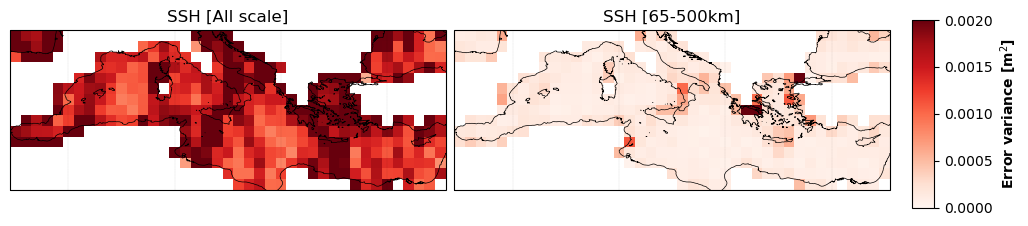

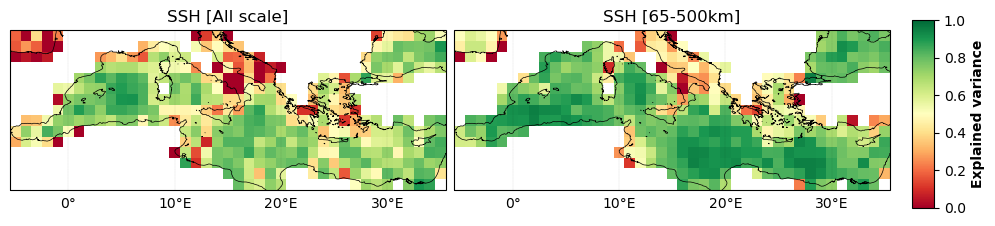

In [9]:
# Plot gridded stats 
plot_stat_score_map_png(stat_output_filename,region='4DMedSea',box_lonlat=box_lonlat)

## 2.3 Compute & plot temporal RMSE

In [10]:
compute_temporal_rmse(ds_interp, method_name, time_min, time_max, rmse_filename)

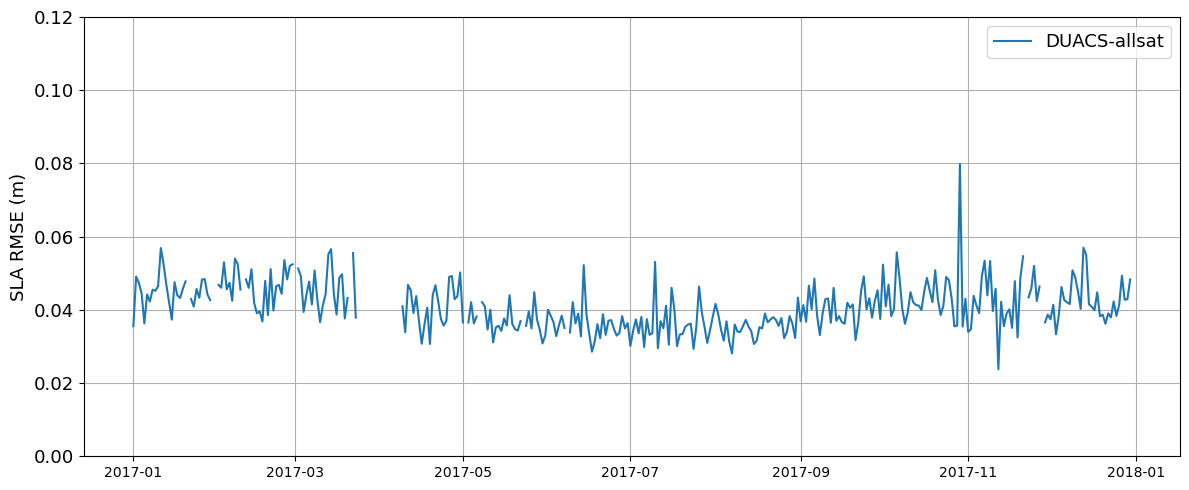

In [11]:
plot_temporal_rmse(rmse_filename)

## 2.4 Compute Spectral scores

In [12]:
compute_psd_scores_v2(ds_interp, psd_output_filename, lenght_scale=segment_lenght, method_name=method_name)

2024-01-12 11:00:10 INFO     Segment computation...
2024-01-12 11:00:12 INFO     Spectral analysis...
2024-01-12 11:01:00 INFO     Saving ouput...
2024-01-12 11:01:04 INFO     PSD file saved as: ../results/psd_sla_DUACS-allsat.nc


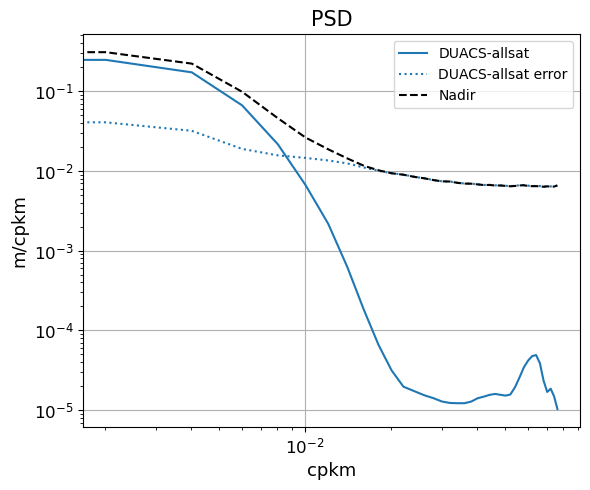

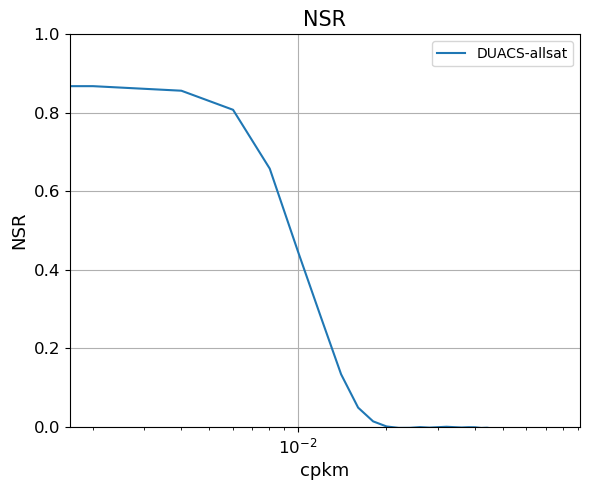

In [13]:
plot_average_psd(psd_output_filename)

Averaged effective resolution: 103.0259129596073 km


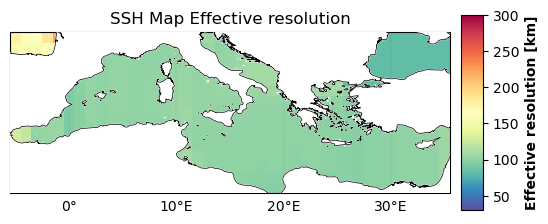

In [14]:
# Plot effective resolution 
plot_effective_resolution_png(psd_output_filename,region='4DMedSea',box_lonlat=box_lonlat, max_resol=300)